# **Reconocimiento de partituras musicales**

En este documento se condensa todo el código realizado para el reconocimiento de partituras musicales. De este modo, se pretende que la ejecución y la interpretación de las funciones implementadas sea la más clara y sencilla posible.

Este trabajo ha sido realizado por:

- Carlos Bermejo Soria
- Tadeo Cabrera Gómez
- Jesús Solís Ortega

## Índice

1. [Inicialización](#1-inicialización)
2. [Segmentación por Regiones](#2-segmentación-por-regiones)
   1. [Transformación Binaria](#21-transformación-binaria)
   2. [Histograma de Proyección Horizontal](#22-histograma-de-proyección-horizontal)
   3. [Segmentación por Regiones](#23-segmentación-por-regiones)

### 1. Inicialización

Antes de comenzar la ejecución de las funciones implementadas en el trabajo, es fundamental suplir las necesidades de las mismas. Parra ello, se ha preparado una celda código que recoge todas las necesidades mínimas del código utilizado. Para ejecutarla haga clic en la celda y presione _CONTROL + ENTER_.

In [14]:
%%capture

#Comente la línea "%%capture" si desea ver la consola de instalación
#Creación de un entorno virtual
!pip install virtualenv
!python -m venv venv
!venv\Scripts\activate

#Instalación de los paquetes de "requirements.txt"
!python --version
!python.exe -m pip install --upgrade pip
!pip install -r ../requirements.txt

#Importación de las librerías
import matplotlib.pyplot as plt
import numpy as np
import cv2
import skimage

#Cambio a la ruta de los archivos de python de nuestro programa
import sys
sys.path.append('../src')

### 2. Segmentación por regiones

La segmentación por regiones es un proceso que permite al sistema adivinar las posiciones de las líneas del pentagrama. Esto facilita el reconocimiento de notas que se realizará posteriormente.

### 2.2. Transformación binaria

La transformación binaria toma la imagen original de la partitura y convierte sus niveles digitales en valores de 0 o 255 exclusivamente. Para ello, hace uso de la función _threshold_ de OpenCV.

En el ejemplo, la transformación binaria se realiza sobre la imagen y el resultado es mostrado en pantalla. Además, se realiza una imprimición de los niveles digitales de la imagen binaria para comprobar que, efectivamente, funciona.


- Niveles digitales de la imagen original:  {0, 134, 14, 150, 153, 26, 32, 169, 42, 51, 180, 187, 66, 196, 205, 81, 213, 89, 222, 101, 231, 240, 118, 249, 255} 

- Niveles digitales de la imagen binaria:  {0, 255}


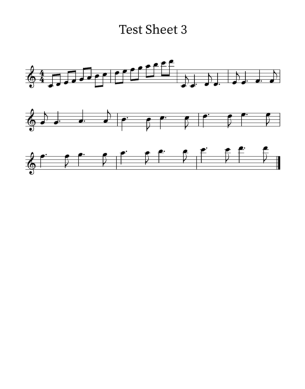

In [32]:
import stuff_region_segmentation

i=3
image = cv2.imread(r'../images/Test Sheet '+str(i)+'.png')
binary_image = stuff_region_segmentation.binary_transform(image)
digital_levels_image = set(image.flatten())
digital_levels_binary = set(binary_image.flatten())

print("- Niveles digitales de la imagen original: ",digital_levels_image,"\n")
print("- Niveles digitales de la imagen binaria: ",digital_levels_binary)

plt.imshow(binary_image)
plt.axis('off')
plt.show()



In [4]:
#FUNCIONES
def normalize(array):
    return np.clip(array, 0, 255).astype(np.uint8)

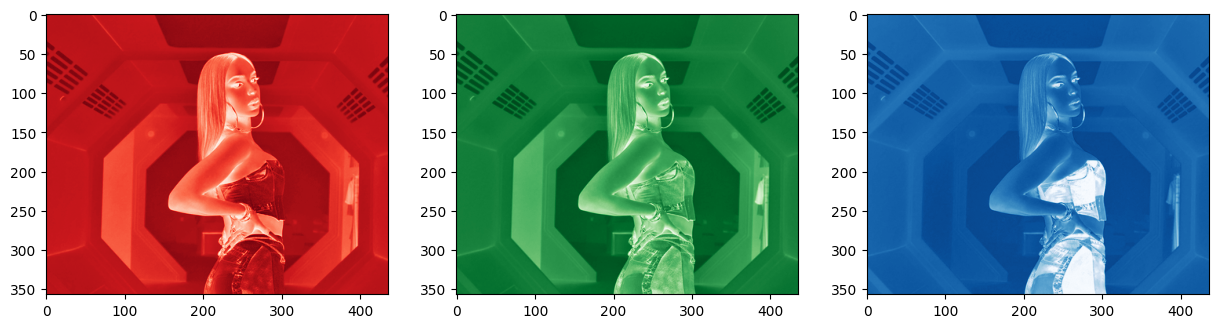

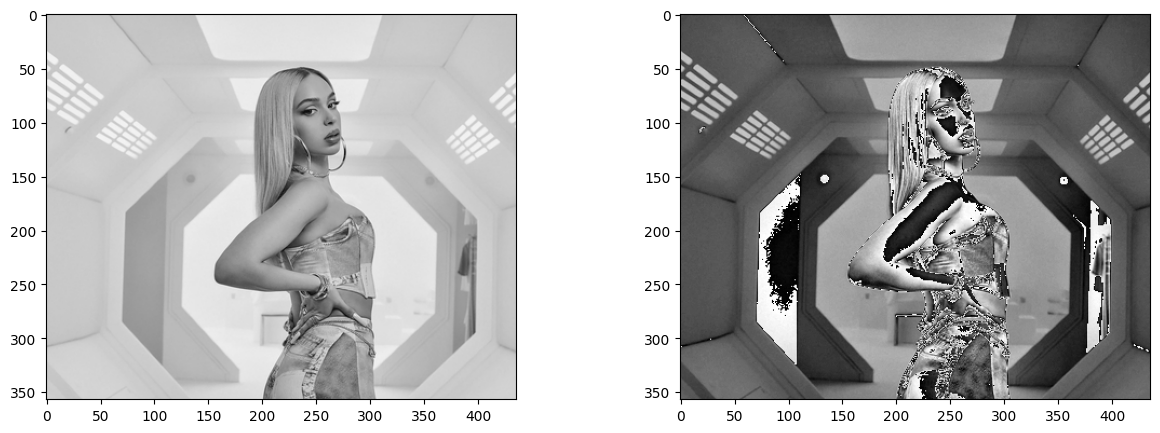

In [7]:
#EJERCICIO 2
imagen = cv2.imread(r'..\..\..\imagenes\badgyal.png')
imagenRGB = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

#a)
b,g,r = cv2.split(imagenRGB)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(r, cmap='Reds')
axs[1].imshow(g, cmap='Greens')
axs[2].imshow(b, cmap='Blues')
plt.show()

#b)
bw1 = imagenRGB
bw1[:,:,0] = r*0.299 + g*0.587 + b*0.144 
bw1[:,:,1] = r*0.299 + g*0.587 + b*0.144 
bw1[:,:,2] = r*0.299 + g*0.587 + b*0.144  
bw2 = imagenRGB
bw2 = 1/3*(r+g+b)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(bw1)
axs[1].imshow(bw2, cmap='gray')
plt.show()

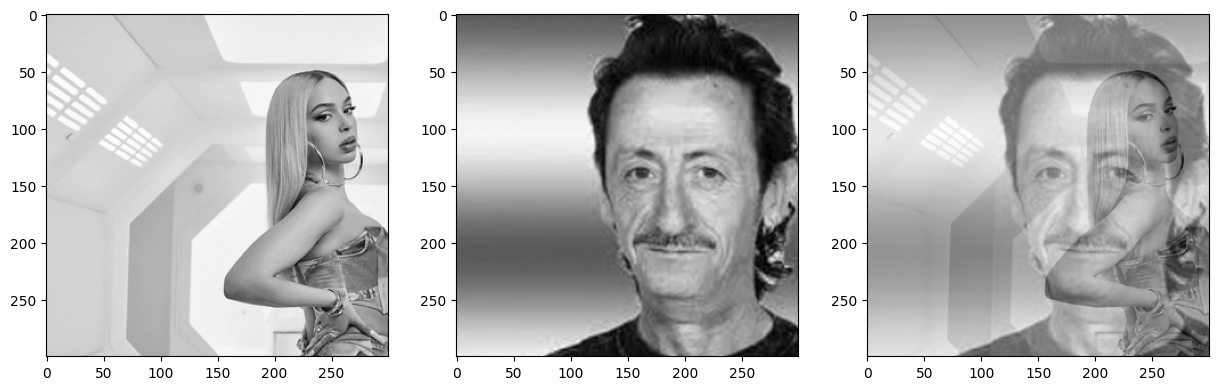

In [61]:
#EJERCICIO 3

im1 = cv2.imread(r'.\imagenes\badgyal.png')
im1RGB = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.imread(r'.\imagenes\mariano.png')
im2RGB = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
n=300
b1,g1,r1 = cv2.split(im1)
bw1 = r1[:n,:n]*0.299 + g1[:n,:n]*0.587 + b1[:n,:n]*0.144 
b2,g2,r2 = cv2.split(im2)
bw2 = r2[:n,:n]*0.299 + g2[:n,:n]*0.587 + b2[:n,:n]*0.144  
suma = bw1+bw2
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(bw1, cmap='gray')
axs[1].imshow(bw2, cmap='gray')
axs[2].imshow(suma, cmap='gray')
plt.show()

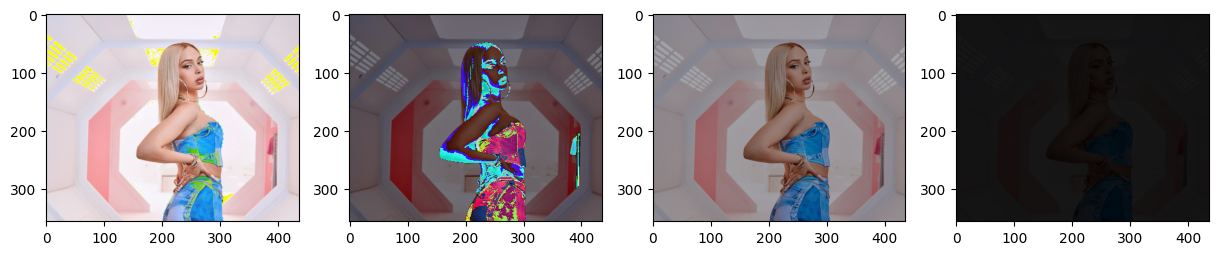

In [66]:
#EJERCICIO 4

imagen = cv2.imread(r'.\imagenes\badgyal.png')
imagenRGB = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
b,g,r = cv2.split(imagenRGB)
suma1 = normalize(imagenRGB + 20)
suma2 = normalize(imagenRGB + 140)
div1 = normalize(imagenRGB*0.7)
div2 = normalize(imagenRGB*0.1)

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(suma1)
axs[1].imshow(suma2)
axs[2].imshow(div1)
axs[3].imshow(div2)